# Limpieza y Análisis de URLs Legítimas - Sector Streaming

Este notebook contiene el análisis exploratorio y la limpieza inicial del dataset consolidado de URLs legítimas del sector streaming.

## Objetivos

- Evaluar la calidad y cantidad de los datos crudos.  
- Identificar valores nulos, duplicados y otras inconsistencias en las columnas principales.  
- Filtrar filas sin URLs válidas para obtener un dataset limpio y útil para modelado.  
- Documentar cada paso para facilitar la comprensión y reproducibilidad.


In [1]:
import pandas as pd
import os

# Parámetros
base_path = '/Users/test/Desktop/phishing-detector/data/raw/legitimas'
archivo = 'streaming_legitimas_crudo.csv'
ruta_archivo = os.path.join(base_path, archivo)

# Cargar CSV
df_streaming = pd.read_csv(ruta_archivo)

print(f"Dataset cargado para el sector Streaming con {len(df_streaming)} filas.")
print(f"Columnas disponibles: {df_streaming.columns.tolist()}")


Dataset cargado para el sector Streaming con 495 filas.
Columnas disponibles: ['empresa', 'url', 'fecha', 'estado']


In [2]:
# Muestra información general del DataFrame, incluyendo tipos de datos y no nulos
print("Información general del DataFrame:")
print(df_streaming.info())

# Muestra conteo de valores nulos por columna para evaluación de calidad
print("\nValores nulos por columna:")
print(df_streaming.isnull().sum())


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   empresa  495 non-null    object
 1   url      494 non-null    object
 2   fecha    495 non-null    object
 3   estado   495 non-null    object
dtypes: object(4)
memory usage: 15.6+ KB
None

Valores nulos por columna:
empresa    0
url        1
fecha      0
estado     0
dtype: int64


In [3]:
# Filtra filas donde la columna 'url' no es nula
df_streaming_limpio = df_streaming[df_streaming['url'].notna()].copy()

# Muestra cuántas filas quedan tras eliminar URLs nulas
print(f"Filas tras eliminar URLs nulas: {len(df_streaming_limpio)}")


Filas tras eliminar URLs nulas: 494


In [4]:
import validators  # Importa librería para validar URLs

# Función para validar URLs: devuelve True si válida, False si no
def es_url_valida(url):
    if pd.isna(url):
        return False  # Nulas consideradas inválidas
    resultado = validators.url(url)
    return resultado is True

# Aplicar validación a cada URL en la columna 'url'
df_streaming_limpio['url_valida'] = df_streaming_limpio['url'].apply(es_url_valida)

# Cálculo de totales para resumen
total_urls = len(df_streaming_limpio)
urls_validas = df_streaming_limpio['url_valida'].sum()
urls_invalidas = total_urls - urls_validas

# Mostrar resumen de validación de URLs
print(f"Total URLs: {total_urls}")
print(f"URLs válidas: {urls_validas} ({urls_validas / total_urls * 100:.2f}%)")
print(f"URLs inválidas: {urls_invalidas} ({urls_invalidas / total_urls * 100:.2f}%)")

# Mostrar ejemplos de URLs inválidas para inspección manual
if urls_invalidas > 0:
    print("Ejemplos de URLs inválidas:")
    print(df_streaming_limpio.loc[~df_streaming_limpio['url_valida'], 'url'].head(10))


Total URLs: 494
URLs válidas: 492 (99.60%)
URLs inválidas: 2 (0.40%)
Ejemplos de URLs inválidas:
224    https://store.steampowered.com/genre/Free to P...
351    https://store.steampowered.com/genre/Free to P...
Name: url, dtype: object


Distribución por empresa:
empresa
STEAM          375
HBO             39
DISNEY+         34
PRIME VIDEO     32
NETFLIX         11
SPOTIFY          2
MOVISTAR+        1
Name: count, dtype: int64


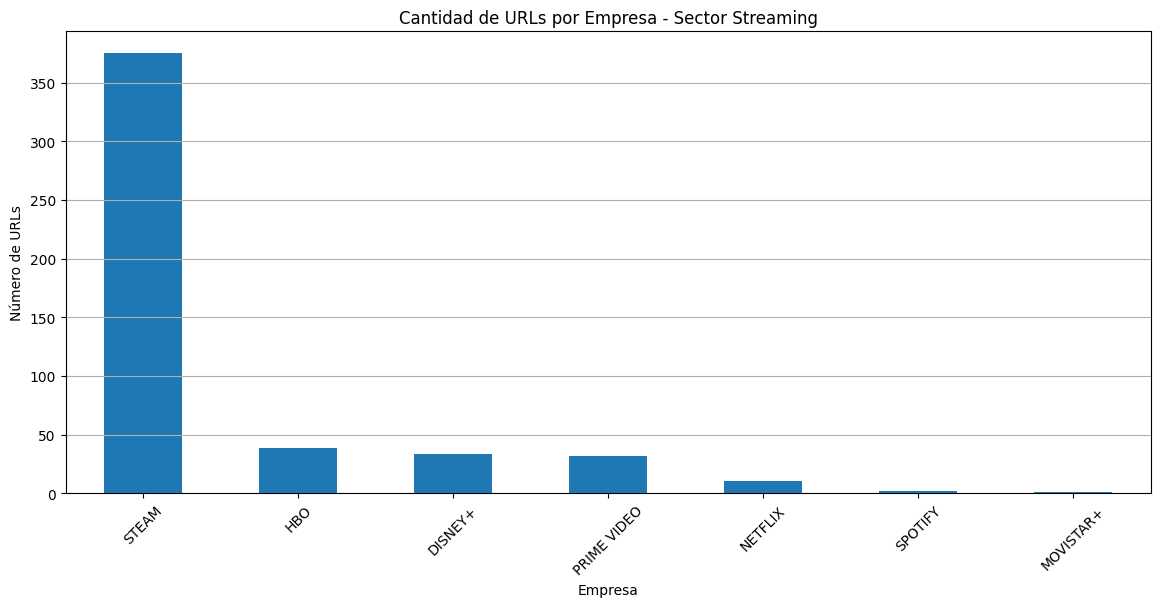

In [6]:
# Normalizar nombres en columna 'empresa' para evitar errores por mayúsculas o espacios
df_streaming_limpio['empresa'] = df_streaming_limpio['empresa'].str.upper().str.strip()

# Contar número de URLs por empresa
distribucion = df_streaming_limpio['empresa'].value_counts()

# Mostrar distribución por empresa
print("Distribución por empresa:")
print(distribucion)

import matplotlib.pyplot as plt  # Para graficar

# Configurar tamaño de gráfico
plt.figure(figsize=(14,6))

# Graficar barras de distribución
distribucion.plot(kind='bar')

# Añadir títulos y etiquetas
plt.title('Cantidad de URLs por Empresa - Sector Streaming')
plt.xlabel('Empresa')
plt.ylabel('Número de URLs')

# Rotar etiquetas para mejor lectura
plt.xticks(rotation=45)

# Añadir cuadrícula horizontal
plt.grid(axis='y')

# Mostrar gráfico
plt.show()


In [7]:
import os  # Para manejo de archivos

# Definir ruta para guardar datos procesados
base_path_processed = '/Users/test/Desktop/phishing-detector/data/processed/legitimas'

# Crear carpeta si no existe para evitar errores
os.makedirs(base_path_processed, exist_ok=True)

# Nombre del archivo limpio
archivo_limpio = 'streaming_legitimas_limpio.csv'

# Construir ruta completa para archivo
ruta_guardado = os.path.join(base_path_processed, archivo_limpio)

# Seleccionar columnas relevantes para modelo
columnas_relevantes = ['empresa', 'url']

# Crear DataFrame solo con columnas relevantes y eliminar duplicados
df_modelo = df_streaming_limpio[columnas_relevantes].drop_duplicates()

# Mostrar cantidad de filas tras eliminar duplicados
print(f"Filas tras eliminar duplicados en columnas relevantes: {len(df_modelo)}")

# Guardar DataFrame limpio a CSV sin índice
df_modelo.to_csv(ruta_guardado, index=False)

# Confirmar guardado
print(f"Dataset limpio guardado en: {ruta_guardado}")


Filas tras eliminar duplicados en columnas relevantes: 494
Dataset limpio guardado en: /Users/test/Desktop/phishing-detector/data/processed/legitimas/streaming_legitimas_limpio.csv
